In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvp
import CSSS as CSSS

%matplotlib inline

In [2]:
## Create an example case where we separate two signals based on sin functions. 
N = 10

X1 = np.sin(np.arange(N)*2*np.pi/N)*50
Y1 = X1 + np.random.normal(0,4,N) + 10


X2 = np.array([5*elem/100+2 for elem in range(0,N)])
Y2 = X2 + np.random.normal(0,5,N)

Y = Y1 + Y2 


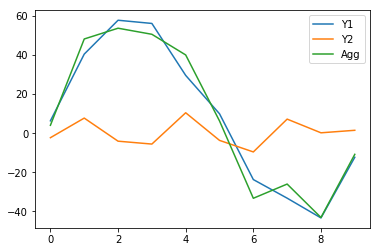

In [3]:
plt.plot(Y1,label='Y1')
plt.plot(Y2,label='Y2')


plt.plot(Y,label='Agg')
plt.legend()

In [4]:
# Try it out. 
CSSEtry = CSSS.CSSS(Y)  ## Instantiate model with aggregate signal, Y
CSSEtry.addSource(np.vstack((np.ones((1,N)),X1)).transpose(), alpha = 1, name = 'Y1')  ## Add a model for Y1
CSSEtry.addSource(X2, alpha = 1, name = 'Y2') ## Add a model for Y2

## Constrain Y2 to be greater than -1 just to try out the constraints. 
#CSSEtry.addConstraint(CSSEtry.models['Y2']['source'] > -10 )

CSSEtry.constructSolve()

    


Setting theta reg cost to 0
Setting theta reg cost to 0


In [5]:
[dual_obj,norm_resid_equality,y]=CSSEtry.admmSolve(10000, MaxIter=1000, ABSTOL=0.001, RELTOL=0.01,verbose=True)

Verbose on
Initialized all sources
('iter num', 'norm_resid', 'last_dual_objective')
(1, 0.02223481757599871, 12362.923284438177, 1147353.8418391326, 2.22521380840744, 0.02223481757599871, 1.1493013473319433)
(2, 0.022225920949078534, 0.001977152893881918, 1146923.0265682344, 0.002621713499591745, 0.022225920949078534, 1.1495167184369328)
(3, 0.02221696329297695, 12353.04116329942, 1146492.3948270127, 2.224318042797282, 0.02221696329297695, 1.1493013473319433)
(4, 0.02220808564853686, 0.007902262795658782, 1146061.946430647, 0.003509477943598276, 0.02220808564853686, 1.1495165456097816)
(5, 0.02219913711762915, 12343.17091917603, 1145631.6812894896, 2.2234231897065118, 0.02219913711762915, 1.1493013473319433)
(6, 0.0221902463446231, 0.017765825654161273, 1145201.5995300526, 0.004398555244215695, 0.0221902463446231, 1.1495163727441204)
(7, 0.022181304817552493, 12333.312543614533, 1144771.7010836885, 2.2225290369994504, 0.022181304817552493, 1.1493013473319433)
(8, 0.022172446032518094,

(79, 0.02154947742953556, 11986.179723565152, 1114295.8978020404, 2.190846517604702, 0.02154947742953556, 1.1493013473319433)
(80, 0.02154087065265307, 3.0661725900580556, 1113879.1798820081, 0.03675945233941064, 0.02154087065265307, 1.1495100801992721)
(81, 0.021532295731339815, 11976.7492671406, 1113462.6389144333, 2.1899890254733765, 0.021532295731339815, 1.1493013473319433)
(82, 0.02152372589452076, 3.2188281193968007, 1113046.274541322, 0.0376164360213167, 0.02152372589452076, 1.1495099140645824)
(83, 0.021515160213971863, 11967.330023367538, 1112630.0866715629, 2.189132457418487, 0.021515160213971863, 1.1493013473319433)
(84, 0.021506607837918287, 3.3750661120072154, 1112214.0751353558, 0.038471673626677916, 0.021506607837918287, 1.1495097481897456)
(85, 0.02149804711829466, 11957.921970528847, 1111798.2398837782, 2.1882763854561227, 0.02149804711829466, 1.1493013473319433)
(86, 0.02148945391958585, 3.5348778973134922, 1111382.5813113563, 0.039330993497567954, 0.02148945391958585

(156, 0.02089637174203758, 11.312440136744529, 1082722.2032783413, 0.06899316279277398, 0.02089637174203758, 1.1495038349511297)
(157, 0.02088800128510917, 11626.583503751684, 1082318.943740467, 2.157793291303486, 0.02088800128510917, 1.1493013473319433)
(158, 0.02087965561464117, 11.595175482587557, 1081915.8565899986, 0.06982772983969819, 0.02087965561464117, 1.1495036729706056)
(159, 0.020871290828233257, 11617.580628487145, 1081512.9417713513, 2.1569568126626866, 0.020871290828233257, 1.1493013473319433)
(160, 0.020862958103531167, 11.881170180999831, 1081110.1991584618, 0.0706610023101621, 0.020862958103531167, 1.1495035111706222)
(161, 0.020854599953721208, 11608.588435588312, 1080707.628686223, 2.156120997681677, 0.020854599953721208, 1.1493013473319433)
(162, 0.02084625599357779, 12.17041627847321, 1080305.2304641511, 0.071495398324011, 0.02084625599357779, 1.1495033493243128)
(163, 0.02083790380344475, 11599.606918270672, 1079903.0044337441, 2.1552857786683663, 0.0208379038034

(222, 0.02035110472848433, 22.319508448275243, 1056474.1814917114, 0.09621228567666727, 0.02035110472848433, 1.1494985512570255)
(223, 0.020342932592095037, 11335.05737336489, 1056082.1728223588, 2.1305055448861445, 0.020342932592095037, 1.1493013473319433)
(224, 0.020334796576843853, 22.705553772909006, 1055690.332543576, 0.09702588720178477, 0.020334796576843853, 1.1494983932293452)
(225, 0.02032663015252604, 11326.400022461656, 1055298.6605994059, 2.1296889024543613, 0.02032663015252604, 1.1493013473319433)
(226, 0.020318500724526917, 23.094595767991986, 1054907.156925382, 0.09783883000169619, 0.020318500724526917, 1.1494982353207837)
(227, 0.02031034057506932, 11317.752912709304, 1054515.8214600368, 2.1288728875086003, 0.02031034057506932, 1.1493013473319433)
(228, 0.020302217819578677, 23.486626731919465, 1054124.6541380803, 0.09865110555076044, 0.020302217819578677, 1.149498077537707)
(229, 0.020294063723299678, 11309.116030580286, 1053733.6549001995, 2.128057477880699, 0.0202940

(286, 0.0198354398160485, 36.121416236969075, 1031722.8359712407, 0.12193073098640639, 0.0198354398160485, 1.149493554409308)
(287, 0.01982746317600938, 11063.039525913506, 1031341.4810298261, 2.1046770485869537, 0.01982746317600938, 1.1493013473319433)
(288, 0.01981954348704083, 36.59960167581243, 1030960.2904488154, 0.12272269988326266, 0.01981954348704083, 1.1494934003721236)
(289, 0.019811573338528343, 11054.703377439642, 1030579.2641646599, 2.103880033735697, 0.019811573338528343, 1.1493013473319433)
(290, 0.019803664276538208, 37.080544512721985, 1030198.4020741113, 0.12351360608227746, 0.019803664276538208, 1.1494932465008711)
(291, 0.019795700210153328, 11046.377045827961, 1029817.7041176185, 2.1030836270972006, 0.019795700210153328, 1.1493013473319433)
(292, 0.019787780883891694, 37.5642376008958, 1029437.170392774, 0.12430553870844274, 0.019787780883891694, 1.149493092589094)
(293, 0.019779822451525812, 11038.060525199651, 1029056.8008444502, 2.102287783860606, 0.019779822451

(352, 0.019317151080118417, 53.31828940331344, 1006903.3963409009, 0.14775992151887046, 0.019317151080118417, 1.149488532132576)
(353, 0.019309377225072023, 10793.064295112827, 1006532.7639832436, 2.0786976440255844, 0.019309377225072023, 1.1493013473319433)
(354, 0.019301649228349472, 53.88370753167031, 1006162.2921226332, 0.1485327211911134, 0.019301649228349472, 1.1494883819180206)
(355, 0.019293880609870008, 10785.04562088143, 1005791.9807078443, 2.077920782177631, 0.019293880609870008, 1.1493013473319433)
(356, 0.019286163126082632, 54.45165053772698, 1005421.8296368197, 0.14930446956984297, 0.019286163126082632, 1.1494882318559245)
(357, 0.019278399720445646, 10777.036356104256, 1005051.8388585581, 2.0771444416139286, 0.019278399720445646, 1.1493013473319433)
(358, 0.01927070168246976, 55.022111775839406, 1004682.0081853081, 0.1500742733674278, 0.01927070168246976, 1.1494880820326276)
(359, 0.01926294368899079, 10769.036483637168, 1004312.3375641383, 2.0763686422660315, 0.0192629

(418, 0.01881209618178659, 73.27383366843503, 982782.9345238456, 0.17292841723159497, 0.01881209618178659, 1.1494836380920146)
(419, 0.018804519331032964, 10533.348144761967, 982422.765763285, 2.0533803503342307, 0.018804519331032964, 1.1493013473319433)
(420, 0.018796966142792436, 73.91905118178525, 982062.753855798, 0.1736837360556318, 0.018796966142792436, 1.149483491480148)
(421, 0.018789393611860026, 10525.6336397883, 981702.8987591874, 2.0526230972409945, 0.018789393611860026, 1.1493013473319433)
(422, 0.018781793767007334, 74.56657460974668, 981343.200919187, 0.17444372054077362, 0.018781793767007334, 1.1494833444573447)
(423, 0.018774231720549445, 10517.928185292367, 980983.6602332215, 2.0518668925951897, 0.018774231720549445, 1.1493013473319433)
(424, 0.018766645947081065, 75.21639586195414, 980624.2765655685, 0.1752022978874215, 0.018766645947081065, 1.14948319767295)
(425, 0.01875908423672968, 10510.23176212601, 980265.0499129512, 2.051110721560062, 0.01875908423672968, 1.14

(485, 0.018313446516050446, 10283.461198308198, 958994.5751724794, 2.0287242840629482, 0.018313446516050446, 1.1493013473319433)
(486, 0.01830611938986276, 96.46824011253993, 958644.7533263136, 0.19811234507714504, 0.01830611938986276, 1.1494787351156392)
(487, 0.01829875254197256, 10276.03777737239, 958295.0840762301, 2.0279875992739202, 0.01829875254197256, 1.1493013473319433)
(488, 0.01829143106378709, 97.18841588019636, 957945.5673669558, 0.19884449289566467, 0.01829143106378709, 1.1494785927840843)
(489, 0.01828407018819573, 10268.622989885629, 957596.2031401348, 2.0272515117147765, 0.01828407018819573, 1.1493013473319433)
(490, 0.01827675482613604, 97.91068879191974, 957246.9913360274, 0.19957602910160158, 0.01827675482613604, 1.14947845056962)
(491, 0.01826939799364906, 10261.216824224357, 956897.9319150959, 2.026515828466081, 0.01826939799364906, 1.1493013473319433)
(492, 0.018262089141038846, 98.63505280782107, 956549.0248138491, 0.2003069143625861, 0.018262089141038846, 1.149

(553, 0.017820231814805406, 10035.844165906186, 935551.6561667239, 2.0040050976894865, 0.017820231814805406, 1.1493013473319433)
(554, 0.01781312190044998, 122.09525030646869, 935212.0838566117, 0.22269290764524338, 0.01781312190044998, 1.1494739579090485)
(555, 0.017805948087541296, 10028.70814094558, 934872.6601351487, 2.003287716398648, 0.017805948087541296, 1.1493013473319433)
(556, 0.01779884217815385, 122.88343888815902, 934533.3849627593, 0.2234034985840062, 0.01779884217815385, 1.1494738195360272)
(557, 0.01779168101128715, 10021.580372625553, 934194.2582160395, 2.0025715997119624, 0.01779168101128715, 1.1493013473319433)
(558, 0.017784578653487183, 123.67352879994344, 933855.2798597441, 0.224113734364018, 0.017784578653487183, 1.1494736813211588)
(559, 0.01777742019328472, 10014.460846622338, 933516.449867343, 2.001855753691722, 0.01777742019328472, 1.1493013473319433)
(560, 0.017770321241776077, 124.46551424175811, 933177.7682049697, 0.22482362951489387, 0.017770321241776077,

(620, 0.017347405333940476, 149.0787320537775, 913126.5812200112, 0.2459081809762265, 0.017347405333940476, 1.1494694450516152)
(621, 0.017340423311373893, 9797.79146568844, 912796.8517135158, 1.97995051211355, 0.017340423311373893, 1.1493013473319433)
(622, 0.01733348915307236, 149.92674093035885, 912467.2671978449, 0.24660159680638205, 0.01733348915307236, 1.1494693102017692)
(623, 0.01732651671541507, 9790.930416214534, 912137.827579457, 1.9792532683478168, 0.01732651671541507, 1.1493013473319433)
(624, 0.017319588823897114, 150.77647187900286, 911808.5327972436, 0.24729438595818115, 0.017319588823897114, 1.1494691755062623)
(625, 0.017312619462738887, 9784.077268505402, 911479.3828210486, 1.978556332231996, 0.017312619462738887, 1.1493013473319433)
(626, 0.017305696343435678, 151.62791956640373, 911150.3776039933, 0.24798669788850483, 0.017305696343435678, 1.149469040886315)
(627, 0.017298732334251093, 9777.232014316163, 910821.517093705, 1.9778599313135392, 0.017298732334251093, 1

(688, 0.016880530171871425, 178.84643136874422, 891032.3530261875, 0.2691763890795275, 0.016880530171871425, 1.1494649209708743)
(689, 0.01687374094422145, 9568.887728624295, 890712.3583020429, 1.9565504835016279, 0.01687374094422145, 1.1493013473319433)
(690, 0.01686699274940845, 179.75011340879016, 890392.5048652312, 0.26985120856082684, 0.01686699274940845, 1.1494647897917396)
(691, 0.01686020428556665, 9562.28976251841, 890072.7927079357, 1.9558716371174534, 0.01686020428556665, 1.1493013473319433)
(692, 0.01685346141328853, 180.65534507438355, 889753.2217780668, 0.27052549578863855, 0.01685346141328853, 1.1494646586707609)
(693, 0.016846684216303164, 9555.699363164602, 889433.7919659178, 1.9551939174189146, 0.016846684216303164, 1.1493013473319433)
(694, 0.016839946239152328, 181.5621217814108, 889114.5032234621, 0.2711992935037213, 0.016839946239152328, 1.1494645277073745)
(695, 0.016833173306855288, 9549.116517724031, 888795.355508906, 1.9545166241892105, 0.016833173306855288, 1

(756, 0.01642626959841226, 210.41225229601565, 869591.946048911, 0.29182053764201404, 0.01642626959841226, 1.1494605191263292)
(757, 0.01641966382165899, 9348.74310829989, 869281.43947325, 1.9337869198078776, 0.01641966382165899, 1.1493013473319433)
(758, 0.016413097231060117, 211.36594314151262, 868971.0706147575, 0.2924771967019018, 0.016413097231060117, 1.1494603914843537)
(759, 0.016406494005133745, 9342.396963103041, 868660.839448187, 1.9331265972152365, 0.016406494005133745, 1.1493013473319433)
(760, 0.0163999322404951, 212.3210228676238, 868350.7459261807, 0.2931333731657675, 0.0163999322404951, 1.149460263913394)
(761, 0.01639334046445897, 9336.058061055335, 868040.7899373948, 1.9324674196116265, 0.01639334046445897, 1.1493013473319433)
(762, 0.016386784700707896, 213.2774872528482, 867730.971423352, 0.2937889495408755, 0.016386784700707896, 1.1494601365125832)
(763, 0.016380194609719, 9329.72638889034, 867421.2903672239, 1.9318084105127353, 0.016380194609719, 1.149301347331943

(821, 0.016003536282463045, 9149.212545135008, 849693.2191893645, 1.9129291014597065, 0.016003536282463045, 1.1493013473319433)
(822, 0.015997136246636366, 242.59293566397469, 849391.55717815, 0.31321547679619766, 0.015997136246636366, 1.1494563607689534)
(823, 0.01599070449004955, 9143.093579263428, 849090.0295523925, 1.9122859258010207, 0.01599070449004955, 1.1493013473319433)
(824, 0.01598430982485082, 243.59010483178446, 848788.6362596054, 0.3138549433160708, 0.01598430982485082, 1.1494562364791967)
(825, 0.015977883988209672, 9136.981564026073, 848487.3772419537, 1.9116433421369037, 0.015977883988209672, 1.1493013473319433)
(826, 0.01597149310392088, 244.58851726139338, 848186.2524619732, 0.31449403174495294, 0.01597149310392088, 1.1494561122835552)
(827, 0.015965070614975624, 9130.876490468167, 847885.2618867104, 1.9110010932423696, 0.015965070614975624, 1.1493013473319433)
(828, 0.015958686180426722, 245.58816851053598, 847584.4054534883, 0.31513247519984344, 0.01595868618042672

(896, 0.01552938646441491, 280.28360352871505, 827438.0836399201, 0.3365396960596196, 0.01552938646441491, 1.149451828213391)
(897, 0.015523146462261848, 8921.504105180078, 827146.3611395708, 1.8888543422854442, 0.015523146462261848, 1.1493013473319433)
(898, 0.015516940498950917, 281.3239970464917, 826854.769249699, 0.3371602923907089, 0.015516940498950917, 1.149451707610519)
(899, 0.015510713886107612, 8915.643124804375, 826563.3078406013, 1.8882316810011572, 0.015510713886107612, 1.1493013473319433)
(900, 0.015504506264424168, 282.3654822617283, 826271.9769260043, 0.3377810545590664, 0.015504506264424168, 1.1494515871226303)
(901, 0.015498273918162298, 8909.78876319977, 825980.7765603203, 1.887608446374953, 0.015498273918162298, 1.1493013473319433)
(902, 0.015492077406377418, 283.40805421971345, 825689.7066370763, 0.3384007057375512, 0.015492077406377418, 1.1494514666850943)
(903, 0.01548585302423691, 8903.941015376957, 825398.7670788065, 1.886986008160901, 0.01548585302423691, 1.14

(965, 0.015105664880106246, 8725.895617134167, 807613.128297398, 1.867938271002098, 0.015105664880106246, 1.1493013473319433)
(966, 0.015099625022258529, 317.32111049557864, 807330.3049827577, 0.3579757687768504, 0.015099625022258529, 1.1494476637730504)
(967, 0.015093556168147986, 8720.255117613027, 807047.6089752016, 1.867331385591001, 0.015093556168147986, 1.1493013473319433)
(968, 0.01508752024561018, 318.39739085841364, 806765.0402357905, 0.3585793610306313, 0.01508752024561018, 1.1494475464755416)
(969, 0.01508146215699006, 8714.620961989476, 806482.5986601871, 1.866725576728995, 0.01508146215699006, 1.1493013473319433)
(970, 0.015075429126209268, 319.4746287676046, 806200.2842192359, 0.35918266410871735, 0.015075429126209268, 1.1494474293113512)
(971, 0.015069379499166842, 8708.993140495655, 805918.0968307274, 1.8661206140247886, 0.015069379499166842, 1.1493013473319433)
(972, 0.015063352785574802, 320.55282071648196, 805636.036433382, 0.35978533546792385, 0.015063352785574802, 

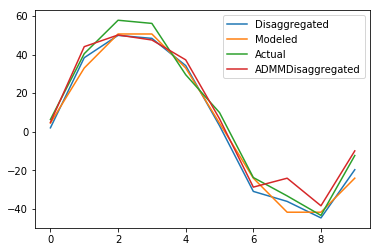

In [6]:
plt.plot(CSSEtry.models['Y1']['source'].value, label = 'Disaggregated')

plt.plot(CSSEtry.models['Y1']['regressor'] * CSSEtry.models['Y1']['theta'].value, label = 'Modeled')
plt.plot(Y1, label = 'Actual')
plt.plot(CSSEtry.models['Y1']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

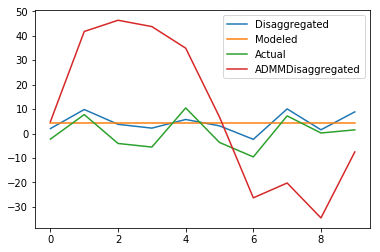

In [7]:
plt.plot(CSSEtry.models['Y2']['source'].value, label = 'Disaggregated')

plt.plot(CSSEtry.models['Y2']['regressor'] * CSSEtry.models['Y2']['theta'].value, label = 'Modeled')
plt.plot(Y2, label = 'Actual')
plt.plot(CSSEtry.models['Y2']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

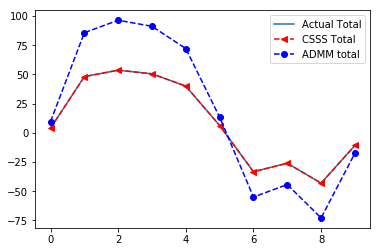

In [8]:
plt.plot(Y, label = 'Actual Total')
plt.plot(CSSEtry.models['Y2']['source'].value+CSSEtry.models['Y1']['source'].value, '--<r',label = 'CSSS Total',)
plt.plot(CSSEtry.models['Y2']['admmSource']+CSSEtry.models['Y1']['admmSource'],'--ob', label = 'ADMM total',)

plt.legend()
plt.show()

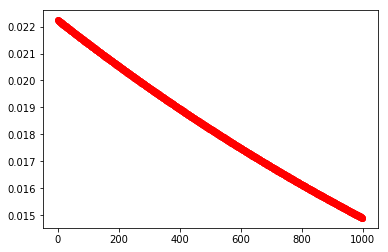

In [9]:
plt.plot(norm_resid_equality,'or')